# Scarlett Weir - ECON0150 Final Project Notebook





In [ ]:
# Mount your Google Drive. It will prompt you to log into your Google account.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change the working directory to your project folder.
import os
drive_path = '/content/drive/MyDrive/Colab Notebooks/'
project_folder = 'Econ_0150_Project'
os.chdir(drive_path + project_folder)

## Step 0 | Imports and Setup

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [ ]:
# Open a dataset from your project folder in Google Drive
data = pd.read_csv('Transit_stops__by_route.csv')

/tmp/ipython-input-574548705.py:2: DtypeWarning: Columns (38,47,48,49,50,51,52,53,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Transit_stops__by_route.csv')


## Step 1 | Data Preparation



In [ ]:
# Imports
import pandas as pd

df = pd.read_csv("Transit_stops__by_route.csv", low_memory=False)
cols_to_drop = [
    "change_log", "comments", "status_code", "status_notes",
    "status_start", "status_end", "GEOIDFQ", "empty_feat", "munihood_full",
    "x", "y", "trips_7d", "svc_days", "feed_version", "OBJECTID",
    "trips_wd", "direction", "route_sort", "route_filter", "county", "agency", "munihood_display",
    "routes", "stop_lon", "stop_lat", "stop_code", "trips_sa", "start_date", "end_date", "stop_route", "mode", "trips_su", "from_gtfs", "status_start_date", "status_end_date"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns], errors="ignore")
df = df.drop(columns=[c for c in df.columns if df[c].isna().all()])

neighborhood_counts = df["hood"].value_counts()

most_common_hood = neighborhood_counts.idxmax()
most_common_count = neighborhood_counts.max()

print("Neighborhood with most stops:", most_common_hood)
print("Number of stops:", most_common_count)
print("\nFirst 10 Rows of Cleaned Dataset:\n")
print(df.head(10).to_string(index=False, line_width=200))

Neighborhood with most stops: Central Business District
Number of stops: 628

First 10 Rows of Cleaned Dataset:

stop_id                            stop_name                              muni             hood  Count  median_housing_cost
 W15307 MONONGAHELA INCLINE AT UPPER STATION   Pittsburgh city (Allegheny, PA) Mount Washington  237.0             208618.0
 W15308 MONONGAHELA INCLINE AT LOWER STATION   Pittsburgh city (Allegheny, PA)      South Shore  121.0             266260.0
 W15307 MONONGAHELA INCLINE AT UPPER STATION   Pittsburgh city (Allegheny, PA) Mount Washington   26.0             229777.0
 W15308 MONONGAHELA INCLINE AT LOWER STATION   Pittsburgh city (Allegheny, PA)      South Shore  102.0             557382.0
 W06290    DUQUESNE INCLINE AT LOWER STATION   Pittsburgh city (Allegheny, PA)      South Shore   75.0             231829.0
 W06300    DUQUESNE INCLINE AT UPPER STATION   Pittsburgh city (Allegheny, PA) Duquesne Heights   71.0             142515.0
 W06290    DUQUESNE

In [ ]:
# Save your dataset after you've worked on it
data.to_csv('cleaned_data.csv')

## Step 2 | Exploratory Data Analysis


This project looks at whether neighborhoods in Pittsburgh with more public transit options tend to have higher median house values. Does having more bus stops mean homes are worth more?

**Dependent variable:** Number of PRT bus stops in each Pittsburgh neighborhood

**Independent variable:** Median house cost in each neighborhood (in US dollars)

**Key relationship of interest:**
How does the number of bus stops in a neighborhood affect its median home value?

**Hypothesis:**
Neighborhoods with more bus stops will tend to have higher median home values.

**Data Sources:**
Pittsburgh Regional Transit Open Data and Zillow

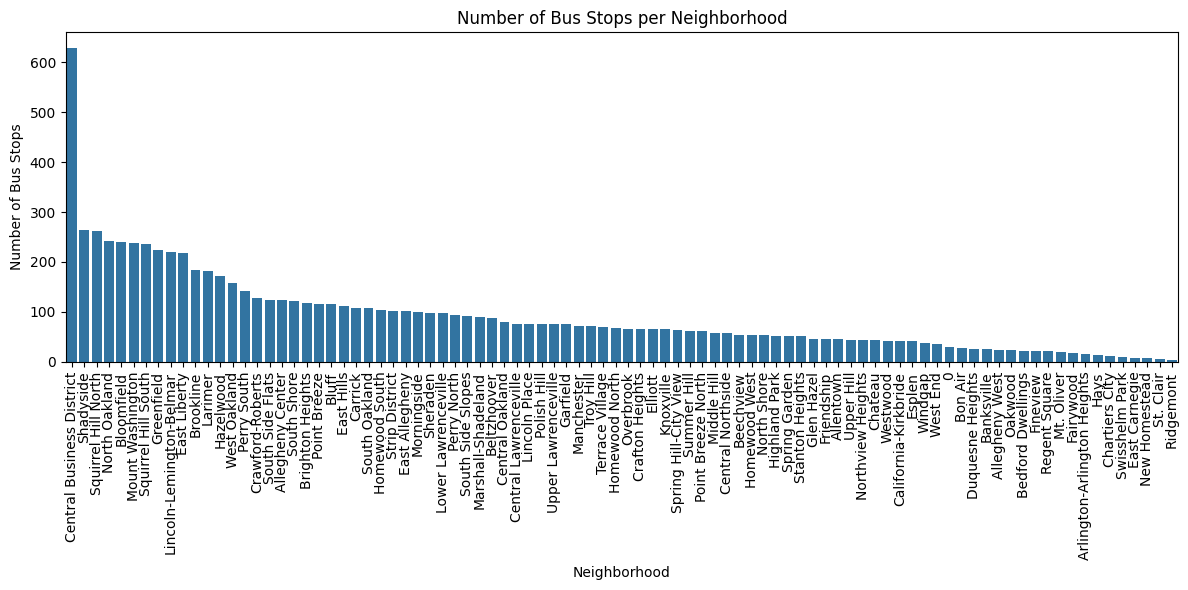

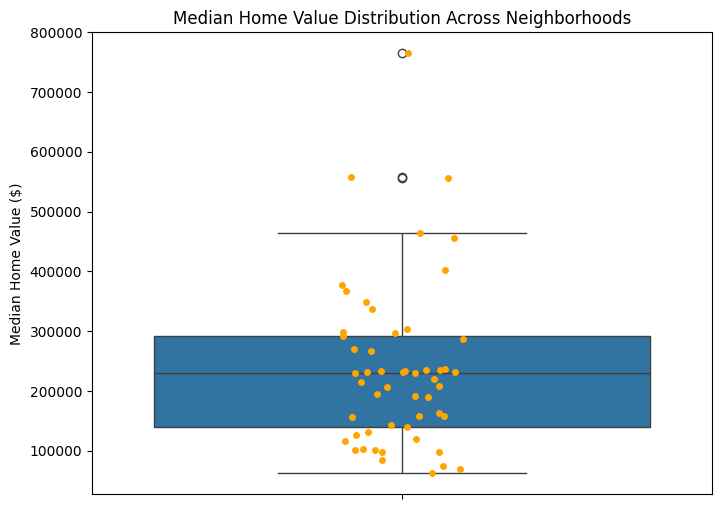

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Transit_stops__by_route.csv')

bus_counts = data['hood'].value_counts().reset_index()
bus_counts.columns = ['Neighborhood', 'BusStops']
median_values = data.groupby('hood')['median_housing_cost'].mean().reset_index()
median_values.columns = ['Neighborhood', 'MedianHomeValue']

# Plot number of bus stops in each neighborhood
plt.figure(figsize=(12,6))
sns.barplot(x='Neighborhood', y='BusStops', data=bus_counts)
plt.xticks(rotation=90)  # rotate neighborhood names for readability
plt.title('Number of Bus Stops per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Bus Stops')
plt.tight_layout()
plt.show()

# Plot box plot of median home value distribution across neighborhoods
plt.figure(figsize=(8,6))
sns.boxplot(y=data['median_housing_cost'])
sns.stripplot(y=data['median_housing_cost'], color='orange', jitter=True)
plt.ylabel('Median Home Value ($)')
plt.title('Median Home Value Distribution Across Neighborhoods')
plt.show()



## Step 3 (Part 3 - 5)

**Null hypothesis:** H0: β1 = 0

H0: Number of bus stops does not affect median home value. β1 is the coefficient of the number of bus stops in the regression.


**Statistical model:** linear regression

MedianHomeValue = β0 + β1 x BusStops + ϵ


**Variables:**

*MedianHomeValue* is the dependent variable.

*BusStops* is the independent variable.
β0 is the intercept.

*β* is the slope (the effect of an additional bus stop).

*ϵ* is the error term.

**Results:**

y = 374.91x + 195,785.01

*P-value* = 0.047

**Conclusion:**

There is a positive relationship between the number of bus stops in a neighborhood and median home values.

Each additional bus stop in a neighborhood is linked to about a $375 increase in median house cost.



                             OLS Regression Results                            
Dep. Variable:     median_housing_cost   R-squared:                       0.075
Model:                             OLS   Adj. R-squared:                  0.057
Method:                  Least Squares   F-statistic:                     4.134
Date:                 Fri, 12 Dec 2025   Prob (F-statistic):             0.0473
Time:                         15:54:36   Log-Likelihood:                -699.98
No. Observations:                   53   AIC:                             1404.
Df Residuals:                       51   BIC:                             1408.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.958e+05   2.77e+04      7.06

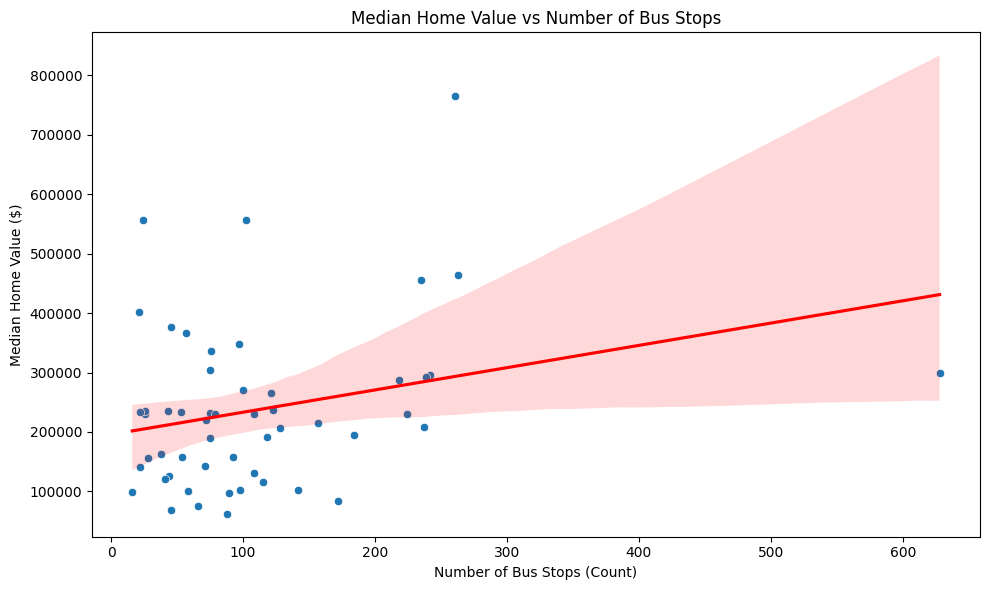

In [ ]:
# Imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Transit_stops__by_route.csv')

data['Count'] = pd.to_numeric(data['Count'], errors='coerce')
data['median_housing_cost'] = pd.to_numeric(data['median_housing_cost'], errors='coerce')
data = data.dropna(subset=['Count', 'median_housing_cost'])

X = sm.add_constant(data['Count'])
y = data['median_housing_cost']

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot median home value vs bus stop count
plt.figure(figsize=(10,6))
sns.scatterplot(x='Count', y='median_housing_cost', data=data)
sns.regplot(x='Count', y='median_housing_cost', data=data, scatter=False, color='red')
plt.title('Median Home Value vs Number of Bus Stops')
plt.xlabel('Number of Bus Stops (Count)')
plt.ylabel('Median Home Value ($)')
plt.tight_layout()
plt.show()